I'm processing
I'm processing
I'm processing
I'm processing


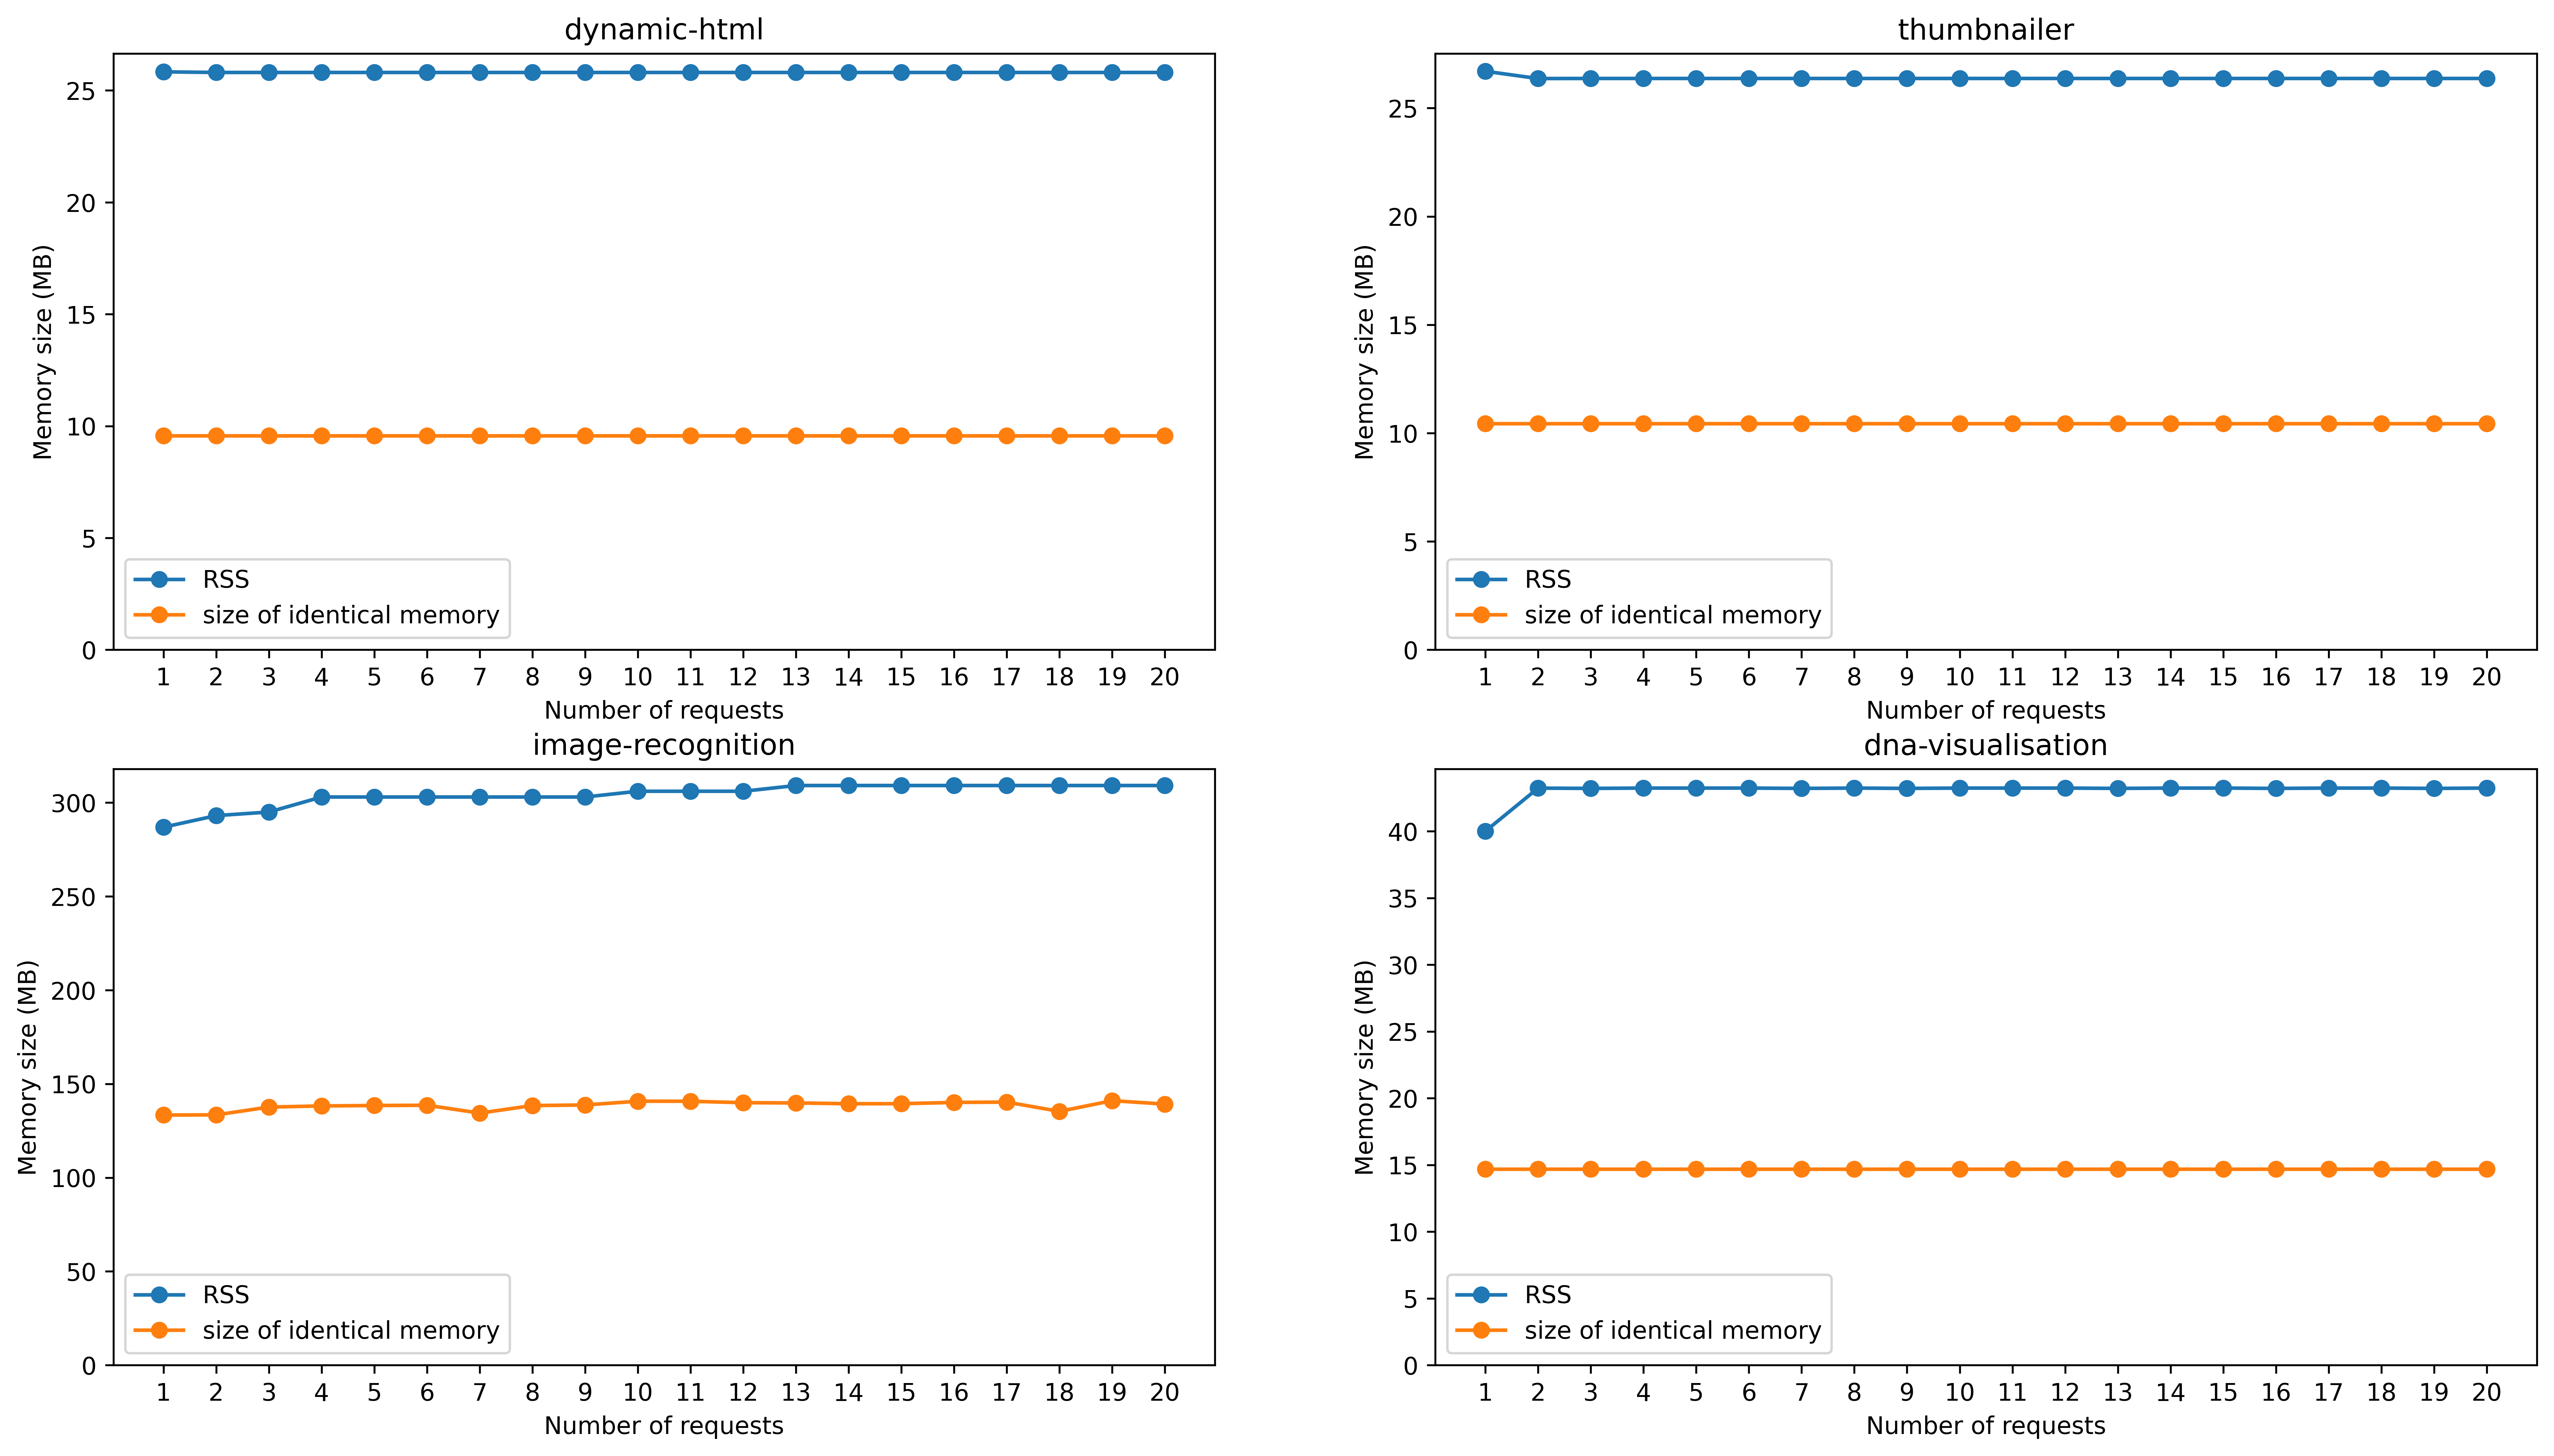

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
# in curl_container* dir, run python3 plot.py

# benchmark = sys.argv[0]

benchmarks = ["110.dynamic-html", "210.thumbnailer", "411.image-recognition", "504.dna-visualisation"]


for benchmark in benchmarks:
    if benchmark == "411.image-recognition":
        data_dir = os.path.join("/data", benchmark + "/", "curl20/", "curl_container1")
        data_dir2 = os.path.join("/data", benchmark + "/", "curl20")
    else:
        data_dir = os.path.join("/data", benchmark + "/", "curl_container1")
        data_dir2 = os.path.join("/data", benchmark + "/")
    
    curl_file = os.path.join(data_dir + "/", "pmap_result.csv")

    curl_data = pd.read_csv(curl_file)
#     print (curl_data)
    curl_data["file"] = curl_data["file"].str.extract('(\d+)', expand=False)
    curl_data["rss"] = curl_data["rss"].values / 1024
    curl_data["pss"] = curl_data["pss"].values / 1024

    

    checkpoint_file = os.path.join(data_dir2 + "/", "identicalpage_result.csv")
    checkpoint_data = pd.read_csv(checkpoint_file)
#     print (checkpoint_data)
    checkpoint_data["identical page num"] = checkpoint_data["identical page num"].values * 4 / 1024

    if benchmark == "110.dynamic-html":
        plt.subplot(2, 2, 1)
    if benchmark == "210.thumbnailer":
        plt.subplot(2, 2, 2)
    if benchmark == "411.image-recognition":
        plt.subplot(2, 2, 3)
    if benchmark == "504.dna-visualisation":
        plt.subplot(2, 2, 4)
#     plt.rcParams['figure.dpi'] = 600
    print("I'm processing")
    
    plt.rcParams["figure.figsize"] = (18,11)
    
    plt.plot(curl_data["file"], curl_data["rss"], 'o-', label="RSS")
    # plt.plot(curl_data["file"], curl_data[" pss"], 'o-', label="pss")

    plt.plot(curl_data["file"], checkpoint_data["identical page num"], 'o-', label="size of identical memory")
    # shareable = checkpoint_data["identical page num"].values - curl_data["shared_clean"].values / 1024
    # print (shareable)
    # plt.plot(curl_data["file"], shareable, 'o-', label="size of shareable pages")
 
    plt.title(benchmark[4:])
    # plt.title("image-recognition")
    # plt.title("dna-visualisation")
    plt.xlabel('Number of requests')
    plt.ylabel('Memory size (MB)')
    plt.ylim(ymin=0)
    plt.legend()

